In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats
from random import random

In [24]:
df = pd.read_csv("small_dataset.csv")

In [26]:
def laplaceMechanism(x, epsilon, sensitivity, upper_limit):
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.laplace(0, sensitivity/epsilon, 1)[0]
        if (private_val > upper_limit):
            private_val = upper_limit
            not_in_range = False
        if (private_val > 0):
            not_in_range = False
    return private_val
    #scale = 1 / epsilon
    #unif_rv = random() - 0.5
    #return x - scale * np.sign(unif_rv) * np.log(1 - 2 * np.abs(unif_rv))

def gaussianMechanism(x, epsilon, sensitivity, delta, upper_limit):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * sensitivity / epsilon
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.normal(0, sigma, 1)[0]
        if (private_val > upper_limit):
            private_val = upper_limit
            not_in_range = False
        if (private_val >= 0):
            not_in_range = False
    return private_val

In [28]:
#def laplaceMechanism(x, epsilon, upper_limit):
#    not_in_range = True
#    while (not_in_range):
#        private_val = x + np.random.laplace(0, 1.0/epsilon, 1)[0]
#        if (private_val > upper_limit):
#            private_val = upper_limit
#            not_in_range = False
#        if (private_val > 0):
#            not_in_range = False
#    return private_val

In [30]:
def mape(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100
def rmse(y_true, y_pred):
    return np.sqrt((y_pred - y_true)**2)
def mape_array(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
# Demo
#lapalce sen = 1
normal_average = []
adj_average = []
for x in range(0, 19):
    df_test = pd.read_csv("small_dataset.csv")
    df_adjacent = df_test.iloc[1:]
    epsilon = 1
    sensitivity = 1
    nrm_query = np.sum(df_test['wage'] < 10)
    adj_query = np.sum(df_adjacent['wage'] < 10)
    private_nrm_query = laplaceMechanism(nrm_query, epsilon, sensitivity, 200)
    private_nrm_adj_query = laplaceMechanism(adj_query, epsilon, sensitivity, 200)
    #df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1,200))
    #df_adjacent['wage'] = df_adjacent['wage'].apply(laplaceMechanism, args=(0.1,200))
    normal_average.append(private_nrm_query)
    adj_average.append(private_nrm_adj_query)

In [34]:
# Demo
#lapalce sen = 2
#normal_average = []
#adj_average = []
#for x in range(0, 19):
#    df_test = pd.read_csv("small_dataset.csv")
#    df_adjacent = df_test.iloc[1:]
#    epsilon = 1
#    sensitivity = 2
#    nrm_query_join = df_test.query('age > 35 & wage > 10')
#    nrm_query = len(nrm_query_join)
#    adj_query_join = df_adjacent.query('age > 35 & wage > 10')
#    adj_query = len(adj_query_join)
#    private_nrm_query = laplaceMechanism(nrm_query, epsilon, sensitivity, 200)
#    private_nrm_adj_query = laplaceMechanism(adj_query, epsilon, sensitivity, 200)
    #df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1,200))
    #df_adjacent['wage'] = df_adjacent['wage'].apply(laplaceMechanism, args=(0.1,200))
#    normal_average.append(private_nrm_query)
 #   adj_average.append(private_nrm_adj_query)

In [36]:
#Demo
# gaussian delta = 1/200 sen = 1
#normal_average = []
#adj_average = []
#for x in range(0, 19):
#    df_test = pd.read_csv("small_dataset.csv")
#    df_adjacent = df_test.iloc[1:]
#    epsilon = 1
#    delta = 1/200
#    sensitivity = 1
#    nrm_query = np.sum(df_test['wage'] < 10)
#    adj_query = np.sum(df_adjacent['wage'] < 10)
#    private_nrm_query = gaussianMechanism(nrm_query, epsilon, sensitivity, delta, 200)
#    private_nrm_adj_query = gaussianMechanism(adj_query, epsilon, sensitivity, delta, 200)
    #df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1,200))
    #df_adjacent['wage'] = df_adjacent['wage'].apply(laplaceMechanism, args=(0.1,200))
#    normal_average.append(private_nrm_query)
#    adj_average.append(private_nrm_adj_query)

In [38]:
#Demo
# gaussian delta = 1/200 sen = sqrt(2)
#normal_average = []
#adj_average = []
#for x in range(0, 19):
#    df_test = pd.read_csv("small_dataset.csv")
#    df_adjacent = df_test.iloc[1:]
#    epsilon = 1
#    delta = 1/200
#    sensitivity = np.sqrt(2)
#    nrm_query_join = df_test.query('age > 35 & wage > 10')
#    nrm_query = len(nrm_query_join)
#    adj_query_join = df_adjacent.query('age > 35 & wage > 10')
#    adj_query = len(adj_query_join)
#    private_nrm_query = gaussianMechanism(nrm_query, epsilon, sensitivity, delta, 200)
#    private_nrm_adj_query = gaussianMechanism(adj_query, epsilon, sensitivity, delta, 200)
    #df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1,200))
    #df_adjacent['wage'] = df_adjacent['wage'].apply(laplaceMechanism, args=(0.1,200))
 #   normal_average.append(private_nrm_query)
 #   adj_average.append(private_nrm_adj_query)

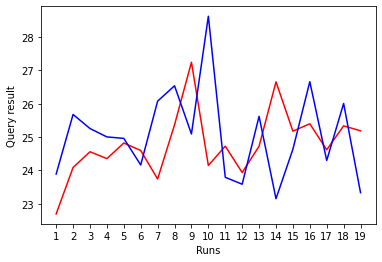

In [40]:
# Demo
runs = list(range(1, 20))
plt.plot(runs, normal_average, 'r')
plt.plot(runs, adj_average, 'b')
plt.xlabel('Runs')
plt.ylabel('Query result')
plt.xticks(list(range(1, 20)))
plt.show()

In [ ]:
print(normal_average)
print(adj_average)

In [12]:
epsilon = 0.5
delta = 1/1000
#upper_limit - lower limit / n 
mean_sensitivity = (60-16)/200
df = pd.read_csv("small_dataset.csv")
wage_query = np.sum(df['wage'] < 10)
age_query = np.sum(df['age'] > 30)
mean_age_query = df['age'].mean()
insured_query = np.sum(df['insured'] == True)
histogram_query = [
    np.sum(df['problem'] == 'breathing'),
    np.sum(df['problem'] == 'dental'),
    np.sum(df['problem'] == 'mental'),
    np.sum(df['problem'] == 'heart')
]
combined_query_join = df.query('age > 35 & wage > 10')
combined_query = len(combined_query_join)

#laplace
wage_average = []
age_average = []
mean_age_average = []
insured_average = []
heart_average = []
dental_average = []
mental_average = []
breathing_average = []
combined_average = []
for x in range(0, 100):
    private_wage_query = laplaceMechanism(wage_query, epsilon, 1, 200)
    wage_average.append(private_wage_query)
    private_age_query = laplaceMechanism(age_query, epsilon, 1, 200)
    age_average.append(private_age_query)
    private_mean_age_query = laplaceMechanism(mean_age_query, epsilon, mean_sensitivity, 200)
    mean_age_average.append(private_mean_age_query)
    private_insured = laplaceMechanism(insured_query, epsilon, 1, 200)
    insured_average.append(private_insured)
    private_heart = laplaceMechanism(histogram_query[0], epsilon, 1, 200)
    heart_average.append(private_heart)
    private_dental = laplaceMechanism(histogram_query[1], epsilon, 1, 200)
    dental_average.append(private_dental)
    private_mental = laplaceMechanism(histogram_query[2], epsilon, 1, 200)
    mental_average.append(private_mental)
    private_breathing = laplaceMechanism(histogram_query[3], epsilon, 1, 200)
    breathing_average.append(private_breathing)
    private_combined = laplaceMechanism(combined_query, epsilon, 2, 200)
    combined_average.append(private_combined)

print("Original wage query ", wage_query)
print("Wage average ", round(np.mean(wage_average), 4))
print("Wage percentage ", round(((np.mean(wage_average) - wage_query) / wage_query) * 100, 4))
print("-------------------")
print("Original age query ", age_query)
print("Age average ", round(np.mean(age_average), 4))
print("Age percentage ", round(((np.mean(age_average) - age_query) / age_query) * 100, 4))
print("-------------------")
print("Original mean age query ", mean_age_query)
print("Mean age average ", round(np.mean(mean_age_average), 4))
print("Mean age percentage ", round(((np.mean(mean_age_average) - mean_age_query) / mean_age_query) * 100, 4))
print("-------------------")
print("Original insured query ", insured_query)
print("Insured average ", round(np.mean(insured_average), 4))
print("Insured percentage ", round(((np.mean(insured_average) - insured_query) / insured_query) * 100, 4))
print("-------------------")
print("Original heart query ", histogram_query[0])
print("Heart average ", round(np.mean(heart_average), 4))
print("Heart average percentage ", round(((np.mean(heart_average) - histogram_query[0]) / histogram_query[0]) * 100, 4))
print("-------------------")
print("Original dental query ", histogram_query[1])
print("Dental average ", round(np.mean(dental_average), 4))
print("Dental average percentage ", round(((np.mean(dental_average) - histogram_query[1]) / histogram_query[1]) * 100, 4))
print("-------------------")
print("Original mental query ", histogram_query[2])
print("Mental average ", round(np.mean(mental_average), 4))
print("Mental average percentage ", round(((np.mean(mental_average) - histogram_query[2]) / histogram_query[2]) * 100, 4))
print("-------------------")
print("Original breathing query ", histogram_query[3])
print("Breathing average ", round(np.mean(breathing_average), 4))
print("Breathing average percentage ", round(((np.mean(breathing_average) - histogram_query[3]) / histogram_query[3]) * 100, 4))
print("-------------------")
print("Original combined query ", combined_query)
print("Combined query average ", round(np.mean(combined_average), 4))
print("Combined query average percentage ", round(((np.mean(combined_average) - combined_query) / combined_query) * 100, 4))



Original wage query  25
Wage average  25.2386
Wage percentage  0.9543
-------------------
Original age query  128
Age average  127.6647
Age percentage  -0.262
-------------------
Original mean age query  37.39
Mean age average  37.3841
Mean age percentage  -0.0159
-------------------
Original insured query  118
Insured average  117.7751
Insured percentage  -0.1906
-------------------
Original heart query  41
Heart average  40.7673
Heart average percentage  -0.5675
-------------------
Original dental query  50
Dental average  50.1072
Dental average percentage  0.2143
-------------------
Original mental query  46
Mental average  45.8771
Mental average percentage  -0.2672
-------------------
Original breathing query  63
Breathing average  63.1441
Breathing average percentage  0.2287
-------------------
Original combined query  105
Combined query average  103.815
Combined query average percentage  -1.1285


In [13]:
#gaussian
wage_average = []
age_average = []
mean_age_average = []
insured_average = []
heart_average = []
dental_average = []
mental_average = []
breathing_average = []
combined_average = []
for x in range(0, 100):
    private_wage_query = gaussianMechanism(wage_query, epsilon, 1, delta, 200)
    wage_average.append(private_wage_query)
    private_age_query = gaussianMechanism(age_query, epsilon, 1, delta, 200)
    age_average.append(private_age_query)
    private_mean_age_query = gaussianMechanism(mean_age_query, epsilon, mean_sensitivity, delta, 200)
    mean_age_average.append(private_mean_age_query)
    private_insured = gaussianMechanism(insured_query, epsilon, 1, delta, 200)
    insured_average.append(private_insured)
    private_heart = gaussianMechanism(histogram_query[0], epsilon, 1, delta, 200)
    heart_average.append(private_heart)
    private_dental = gaussianMechanism(histogram_query[1], epsilon, 1, delta, 200)
    dental_average.append(private_dental)
    private_mental = gaussianMechanism(histogram_query[2], epsilon, 1, delta, 200)
    mental_average.append(private_mental)
    private_breathing = gaussianMechanism(histogram_query[3], epsilon, 1, delta, 200)
    breathing_average.append(private_breathing)
    private_combined = gaussianMechanism(combined_query, epsilon, np.sqrt(2), delta, 200)
    combined_average.append(private_combined)

print("Original wage query ", wage_query)
print("Wage average ", round(np.mean(wage_average), 4))
print("Wage percentage ", round(((np.mean(wage_average) - wage_query) / wage_query) * 100, 4))
print("-------------------")
print("Original age query ", age_query)
print("Age average ", round(np.mean(age_average), 4))
print("Age percentage ", round(((np.mean(age_average) - age_query) / age_query) * 100, 4))
print("-------------------")
print("Original mean age query ", mean_age_query)
print("Mean age average ", round(np.mean(mean_age_average), 4))
print("Mean age percentage ", round(((np.mean(mean_age_average) - mean_age_query) / mean_age_query) * 100, 4))
print("-------------------")
print("Original insured query ", insured_query)
print("Insured average ", round(np.mean(insured_average), 4))
print("Insured percentage ", round(((np.mean(insured_average) - insured_query) / insured_query) * 100, 4))
print("-------------------")
print("Original heart query ", histogram_query[0])
print("Heart average ", round(np.mean(heart_average), 4))
print("Heart average percentage ", round(((np.mean(heart_average) - histogram_query[0]) / histogram_query[0]) * 100, 4))
print("-------------------")
print("Original dental query ", histogram_query[1])
print("Dental average ", round(np.mean(dental_average), 4))
print("Dental average percentage ", round(((np.mean(dental_average) - histogram_query[1]) / histogram_query[1]) * 100, 4))
print("-------------------")
print("Original mental query ", histogram_query[2])
print("Mental average ", round(np.mean(mental_average), 4))
print("Mental average percentage ", round(((np.mean(mental_average) - histogram_query[2]) / histogram_query[2]) * 100, 4))
print("-------------------")
print("Original breathing query ", histogram_query[3])
print("Breathing average ", round(np.mean(breathing_average), 4))
print("Breathing average percentage ", round(((np.mean(breathing_average) - histogram_query[3]) / histogram_query[3]) * 100, 4))
print("-------------------")
print("Original combined query ", combined_query)
print("Combined query average ", round(np.mean(combined_average), 4))
print("Combined query average percentage ", round(((np.mean(combined_average) - combined_query) / combined_query) * 100, 4))

Original wage query  25
Wage average  24.5539
Wage percentage  -1.7844
-------------------
Original age query  128
Age average  126.742
Age percentage  -0.9828
-------------------
Original mean age query  37.39
Mean age average  37.4594
Mean age percentage  0.1855
-------------------
Original insured query  118
Insured average  117.3796
Insured percentage  -0.5258
-------------------
Original heart query  41
Heart average  40.716
Heart average percentage  -0.6926
-------------------
Original dental query  50
Dental average  49.8847
Dental average percentage  -0.2306
-------------------
Original mental query  46
Mental average  46.4088
Mental average percentage  0.8887
-------------------
Original breathing query  63
Breathing average  61.4611
Breathing average percentage  -2.4427
-------------------
Original combined query  105
Combined query average  105.0948
Combined query average percentage  0.0903


In [14]:
df = pd.read_csv("large_dataset.csv")
wage_query = np.sum(df['wage'] < 10)
age_query = np.sum(df['age'] > 30)
mean_age_query = df['age'].mean()
insured_query = np.sum(df['insured'] == True)
histogram_query = [
    np.sum(df['problem'] == 'breathing'),
    np.sum(df['problem'] == 'dental'),
    np.sum(df['problem'] == 'mental'),
    np.sum(df['problem'] == 'heart')
]
combined_query_join = df.query('age > 35 & wage > 10')
combined_query = len(combined_query_join)

In [15]:
#laplace
wage_average = []
age_average = []
mean_age_average = []
insured_average = []
heart_average = []
dental_average = []
mental_average = []
breathing_average = []
combined_average = []
for x in range(0, 100):
    private_wage_query = laplaceMechanism(wage_query, epsilon, 1, 1000)
    wage_average.append(private_wage_query)
    private_age_query = laplaceMechanism(age_query, epsilon, 1, 1000)
    age_average.append(private_age_query)
    private_mean_age_query = laplaceMechanism(mean_age_query, epsilon, mean_sensitivity, 1000)
    mean_age_average.append(private_mean_age_query)
    private_insured = laplaceMechanism(insured_query, epsilon, 1, 1000)
    insured_average.append(private_insured)
    private_heart = laplaceMechanism(histogram_query[0], epsilon, 1, 1000)
    heart_average.append(private_heart)
    private_dental = laplaceMechanism(histogram_query[1], epsilon, 1, 1000)
    dental_average.append(private_dental)
    private_mental = laplaceMechanism(histogram_query[2], epsilon, 1, 1000)
    mental_average.append(private_mental)
    private_breathing = laplaceMechanism(histogram_query[3], epsilon, 1, 1000)
    breathing_average.append(private_breathing)
    private_combined = laplaceMechanism(combined_query, epsilon, 2, 1000)
    combined_average.append(private_combined)

print("Original wage query ", wage_query)
print("Wage average ", round(np.mean(wage_average), 4))
print("Wage percentage ", round(((np.mean(wage_average) - wage_query) / wage_query) * 100, 4))
print("-------------------")
print("Original age query ", age_query)
print("Age average ", round(np.mean(age_average), 4))
print("Age percentage ", round(((np.mean(age_average) - age_query) / age_query) * 100, 4))
print("-------------------")
print("Original mean age query ", mean_age_query)
print("Mean age average ", round(np.mean(mean_age_average), 4))
print("Mean age percentage ", round(((np.mean(mean_age_average) - mean_age_query) / mean_age_query) * 100, 4))
print("-------------------")
print("Original insured query ", insured_query)
print("Insured average ", round(np.mean(insured_average), 4))
print("Insured percentage ", round(((np.mean(insured_average) - insured_query) / insured_query) * 100, 4))
print("-------------------")
print("Original heart query ", histogram_query[0])
print("Heart average ", round(np.mean(heart_average), 4))
print("Heart average percentage ", round(((np.mean(heart_average) - histogram_query[0]) / histogram_query[0]) * 100, 4))
print("-------------------")
print("Original dental query ", histogram_query[1])
print("Dental average ", round(np.mean(dental_average), 4))
print("Dental average percentage ", round(((np.mean(dental_average) - histogram_query[1]) / histogram_query[1]) * 100, 4))
print("-------------------")
print("Original mental query ", histogram_query[2])
print("Mental average ", round(np.mean(mental_average), 4))
print("Mental average percentage ", round(((np.mean(mental_average) - histogram_query[2]) / histogram_query[2]) * 100, 4))
print("-------------------")
print("Original breathing query ", histogram_query[3])
print("Breathing average ", round(np.mean(breathing_average), 4))
print("Breathing average percentage ", round(((np.mean(breathing_average) - histogram_query[3]) / histogram_query[3]) * 100, 4))
print("-------------------")
print("Original combined query ", combined_query)
print("Combined query average ", round(np.mean(combined_average), 4))
print("Combined query average percentage ", round(((np.mean(combined_average) - combined_query) / combined_query) * 100, 4))

Original wage query  274
Wage average  274.329
Wage percentage  0.1201
-------------------
Original age query  659
Age average  659.3761
Age percentage  0.0571
-------------------
Original mean age query  38.02
Mean age average  37.9615
Mean age percentage  -0.1538
-------------------
Original insured query  516
Insured average  515.8913
Insured percentage  -0.0211
-------------------
Original heart query  246
Heart average  245.9972
Heart average percentage  -0.0012
-------------------
Original dental query  250
Dental average  249.9925
Dental average percentage  -0.003
-------------------
Original mental query  250
Mental average  250.1183
Mental average percentage  0.0473
-------------------
Original breathing query  254
Breathing average  254.0636
Breathing average percentage  0.025
-------------------
Original combined query  366
Combined query average  365.5692
Combined query average percentage  -0.1177


In [16]:
#gaussian
wage_average = []
age_average = []
mean_age_average = []
insured_average = []
heart_average = []
dental_average = []
mental_average = []
breathing_average = []
combined_average = []
for x in range(0, 100):
    private_wage_query = gaussianMechanism(wage_query, epsilon, 1, delta, 1000)
    wage_average.append(private_wage_query)
    private_age_query = gaussianMechanism(age_query, epsilon, 1, delta, 1000)
    age_average.append(private_age_query)
    private_mean_age_query = gaussianMechanism(mean_age_query, epsilon, mean_sensitivity, delta, 1000)
    mean_age_average.append(private_mean_age_query)
    private_insured = gaussianMechanism(insured_query, epsilon, 1, delta, 1000)
    insured_average.append(private_insured)
    private_heart = gaussianMechanism(histogram_query[0], epsilon, 1, delta, 1000)
    heart_average.append(private_heart)
    private_dental = gaussianMechanism(histogram_query[1], epsilon, 1, delta, 1000)
    dental_average.append(private_dental)
    private_mental = gaussianMechanism(histogram_query[2], epsilon, 1, delta, 1000)
    mental_average.append(private_mental)
    private_breathing = gaussianMechanism(histogram_query[3], epsilon, 1, delta, 1000)
    breathing_average.append(private_breathing)
    private_combined = gaussianMechanism(combined_query, epsilon, np.sqrt(2), delta, 1000)
    combined_average.append(private_combined)

print("Original wage query ", wage_query)
print("Wage average ", round(np.mean(wage_average), 4))
print("Wage percentage ", round(((np.mean(wage_average) - wage_query) / wage_query) * 100, 4))
print("-------------------")
print("Original age query ", age_query)
print("Age average ", round(np.mean(age_average), 4))
print("Age percentage ", round(((np.mean(age_average) - age_query) / age_query) * 100, 4))
print("-------------------")
print("Original mean age query ", mean_age_query)
print("Mean age average ", round(np.mean(mean_age_average), 4))
print("Mean age percentage ", round(((np.mean(mean_age_average) - mean_age_query) / mean_age_query) * 100, 4))
print("-------------------")
print("Original insured query ", insured_query)
print("Insured average ", round(np.mean(insured_average), 4))
print("Insured percentage ", round(((np.mean(insured_average) - insured_query) / insured_query) * 100, 4))
print("-------------------")
print("Original heart query ", histogram_query[0])
print("Heart average ", round(np.mean(heart_average), 4))
print("Heart average percentage ", round(((np.mean(heart_average) - histogram_query[0]) / histogram_query[0]) * 100, 4))
print("-------------------")
print("Original dental query ", histogram_query[1])
print("Dental average ", round(np.mean(dental_average), 4))
print("Dental average percentage ", round(((np.mean(dental_average) - histogram_query[1]) / histogram_query[1]) * 100, 4))
print("-------------------")
print("Original mental query ", histogram_query[2])
print("Mental average ", round(np.mean(mental_average), 4))
print("Mental average percentage ", round(((np.mean(mental_average) - histogram_query[2]) / histogram_query[2]) * 100, 4))
print("-------------------")
print("Original breathing query ", histogram_query[3])
print("Breathing average ", round(np.mean(breathing_average), 4))
print("Breathing average percentage ", round(((np.mean(breathing_average) - histogram_query[3]) / histogram_query[3]) * 100, 4))
print("-------------------")
print("Original combined query ", combined_query)
print("Combined query average ", round(np.mean(combined_average), 4))
print("Combined query average percentage ", round(((np.mean(combined_average) - combined_query) / combined_query) * 100, 4))

Original wage query  274
Wage average  273.8861
Wage percentage  -0.0416
-------------------
Original age query  659
Age average  658.9571
Age percentage  -0.0065
-------------------
Original mean age query  38.02
Mean age average  38.2043
Mean age percentage  0.4847
-------------------
Original insured query  516
Insured average  515.804
Insured percentage  -0.038
-------------------
Original heart query  246
Heart average  246.0766
Heart average percentage  0.0311
-------------------
Original dental query  250
Dental average  248.9403
Dental average percentage  -0.4239
-------------------
Original mental query  250
Mental average  248.8931
Mental average percentage  -0.4427
-------------------
Original breathing query  254
Breathing average  254.1928
Breathing average percentage  0.0759
-------------------
Original combined query  366
Combined query average  363.9587
Combined query average percentage  -0.5577


In [17]:
df = pd.read_csv("large_dataset.csv")
#df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1,200))
#df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1, 1/400, 200))

epsilons = np.logspace(0, 3, 50)
num_of_runs_for_epsilon = 5000
wage_query = np.sum(df['wage'] < 10)
combined_query_join = df.query('age > 35 & wage > 10')
combined_query = len(combined_query_join)
problem_query = [
    np.sum(df['problem'] == 'breathing'),
    np.sum(df['problem'] == 'dental'),
    np.sum(df['problem'] == 'mental'),
    np.sum(df['problem'] == 'heart')
]

In [18]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_wage_query = laplaceMechanism(wage_query, epsilon, 1, 1000)
        average_rmse.append(rmse(wage_query, private_wage_query))
        average_mape.append(mape(wage_query, private_wage_query))
    laplace_rmse.append(np.mean(average_rmse))
    laplace_mape.append(np.mean(average_mape))

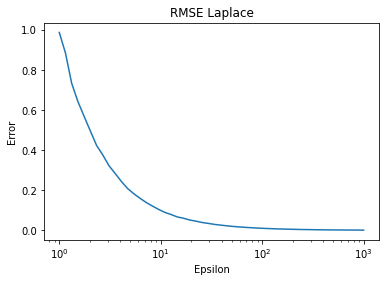

In [19]:
plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Laplace")
plt.show()

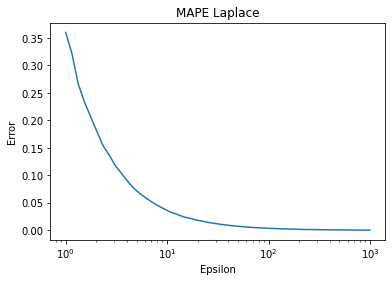

In [20]:
plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

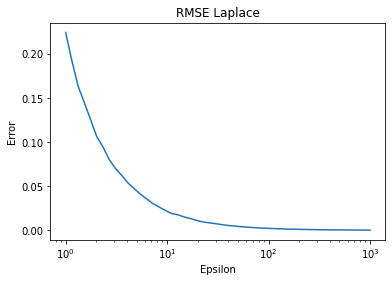

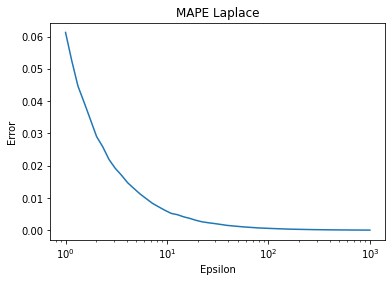

In [21]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_combined_query = laplaceMechanism(combined_query, epsilon, mean_sensitivity, 1000)
        average_rmse.append(rmse(combined_query, private_combined_query))
        average_mape.append(mape(combined_query, private_combined_query))
    laplace_rmse.append(np.mean(average_rmse))
    laplace_mape.append(np.mean(average_mape))

plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Laplace")
plt.show()

plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

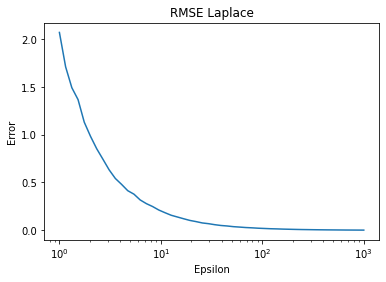

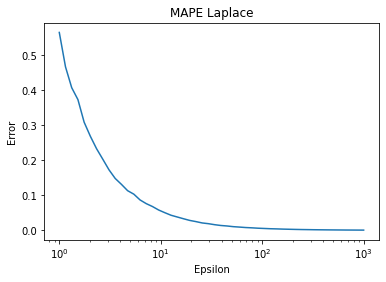

In [23]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_combined_query = laplaceMechanism(combined_query, epsilon, 2, 1000)
        average_rmse.append(rmse(combined_query, private_combined_query))
        average_mape.append(mape(combined_query, private_combined_query))
    laplace_rmse.append(np.mean(average_rmse))
    laplace_mape.append(np.mean(average_mape))

plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Laplace")
plt.show()

plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

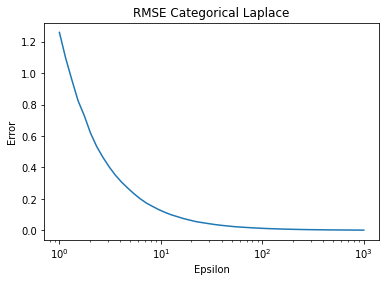

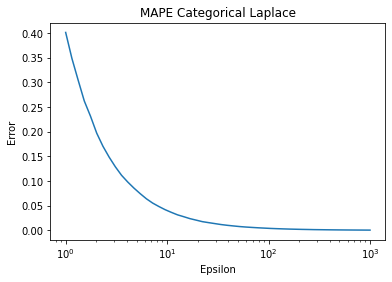

In [25]:
laplace_categorical_rmse = []
laplace_categorical_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_problem_query = []
        for value in problem_query:
            private_problem_query.append(laplaceMechanism(value, epsilon, 1, 1000))
        average_rmse.append(mean_squared_error(problem_query, private_problem_query, squared=False))
        average_mape.append(mape_array(problem_query, private_problem_query))
    laplace_categorical_rmse.append(np.mean(average_rmse))
    laplace_categorical_mape.append(np.mean(average_mape))


plt.semilogx(epsilons, laplace_categorical_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Categorical Laplace")
plt.show()

plt.semilogx(epsilons, laplace_categorical_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Categorical Laplace")
plt.show()

In [27]:
delta_values = [1/500, 1/1000, 1/10000, 1/100000]
gaussian_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_wage_query = gaussianMechanism(wage_query, epsilon, 1, delta_value, 1000)
            average_rmse.append(rmse(wage_query, private_wage_query))
            average_mape.append(mape(wage_query, private_wage_query))
        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_error.append([gaussian_rmse, gaussian_mape])

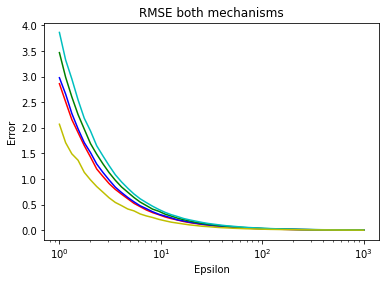

In [29]:
colors = ['r', 'b', 'g', 'c']
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[0], colors[idx])
   

plt.semilogx(epsilons, laplace_rmse, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE both mechanisms")
plt.show()

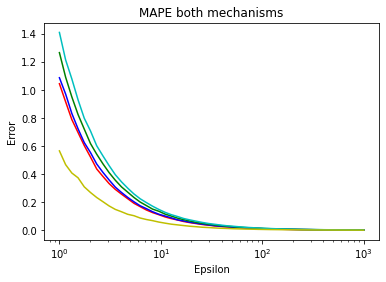

In [31]:
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.semilogx(epsilons, laplace_mape, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE both mechanisms")
plt.show()
#https://www.sciencedirect.com/science/article/pii/S0166218X1630169X
#https://desfontain.es/privacy/differential-privacy-in-practice.html

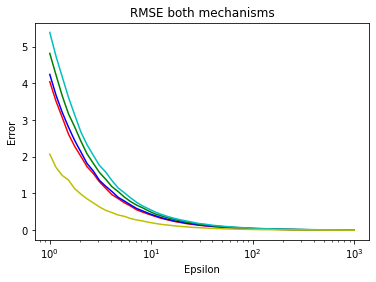

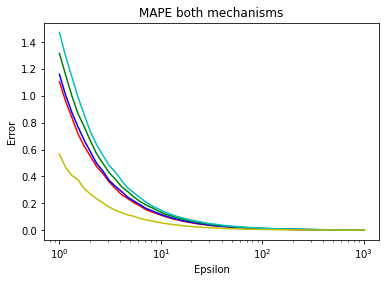

In [33]:
delta_values = [1/500, 1/1000, 1/10000, 1/100000]
gaussian_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_combined_query = gaussianMechanism(combined_query, epsilon, np.sqrt(2), delta_value, 1000)
            average_rmse.append(rmse(combined_query, private_combined_query))
            average_mape.append(mape(combined_query, private_combined_query))
        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_error.append([gaussian_rmse, gaussian_mape])


colors = ['r', 'b', 'g', 'c']

for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[0], colors[idx])

plt.semilogx(epsilons, laplace_rmse, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE both mechanisms")
plt.show()

for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[1], colors[idx])


plt.semilogx(epsilons, laplace_mape, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE both mechanisms")
plt.show()

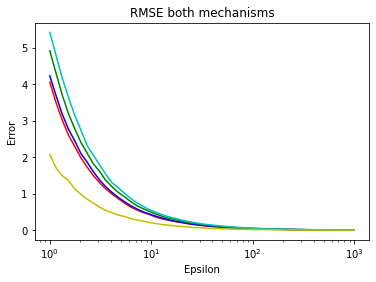

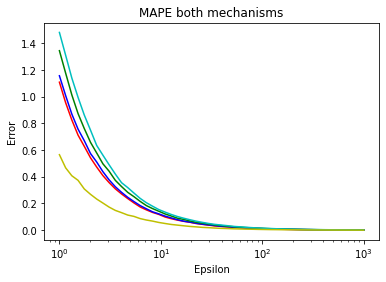

In [35]:
delta_values = [1/500, 1/1000, 1/10000, 1/100000]
gaussian_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_wage_query = gaussianMechanism(wage_query, epsilon, 1, delta_value, 1000)
            average_rmse.append(rmse(wage_query, private_wage_query))
            average_mape.append(mape(wage_query, private_wage_query))
        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_error.append([gaussian_rmse, gaussian_mape])

delta_values = [1/500, 1/1000, 1/10000, 1/100000]
gaussian_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_combined_query = gaussianMechanism(combined_query, epsilon, np.sqrt(2), delta_value, 1000)
            average_rmse.append(rmse(combined_query, private_combined_query))
            average_mape.append(mape(combined_query, private_combined_query))
        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_error.append([gaussian_rmse, gaussian_mape])

colors = ['r', 'b', 'g', 'c']
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[0], colors[idx])
   

plt.semilogx(epsilons, laplace_rmse, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE both mechanisms")
plt.show()

for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.semilogx(epsilons, laplace_mape, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE both mechanisms")
plt.show()
#https://www.sciencedirect.com/science/article/pii/S0166218X1630169X
#https://desfontain.es/privacy/differential-privacy-in-practice.html

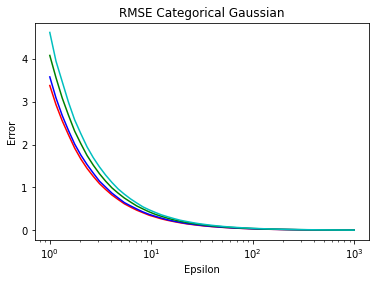

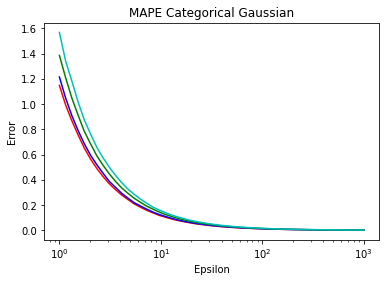

In [37]:
gaussian_categorical_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_problem_query = []
            for value in problem_query:
                private_problem_query.append(gaussianMechanism(value, epsilon, 1, delta_value, 1000))

            average_rmse.append(mean_squared_error(problem_query, private_problem_query, squared=False))
            average_mape.append(mape_array(problem_query, private_problem_query))

        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_categorical_error.append([gaussian_rmse, gaussian_mape])

for idx, error in enumerate(gaussian_categorical_error):
    plt.semilogx(epsilons, error[0], colors[idx])

plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Categorical Gaussian")
plt.show()

for idx, error in enumerate(gaussian_categorical_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Categorical Gaussian")
plt.show()

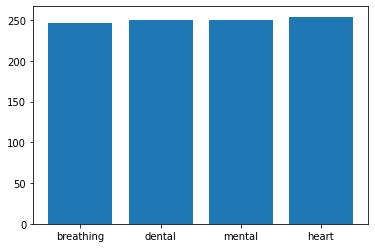

In [39]:
x = np.arange(4)
plt.bar(x, height=problem_query)
plt.xticks(x, ['breathing','dental','mental', 'heart'])
plt.show()

In [41]:
private_problem_query = []
for value in problem_query:
    private_problem_query.append(laplaceMechanism(value, 0.1, 200))

plt.bar(x, height=private_problem_query)
plt.xticks(x, ['breathing','dental','mental', 'heart'])
plt.show()  

TypeError: laplaceMechanism() missing 1 required positional argument: 'upper_limit'

In [43]:
laplace_categorical_rmse = []
laplace_categorical_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_problem_query = []
        for value in problem_query:
            private_problem_query.append(laplaceMechanism(value, epsilon, 1, 1000))
        average_rmse.append(mean_squared_error(problem_query, private_problem_query,squared=False))
        average_mape.append(mape_array(problem_query, private_problem_query))
    laplace_categorical_rmse.append(np.mean(average_rmse))
    laplace_categorical_mape.append(np.mean(average_mape))

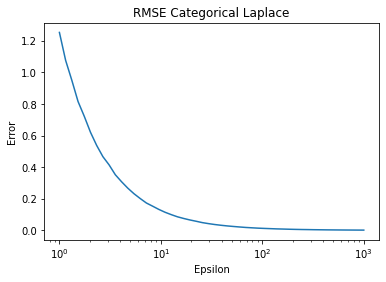

In [44]:
plt.semilogx(epsilons, laplace_categorical_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Categorical Laplace")
plt.show()

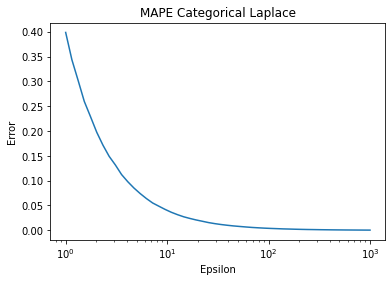

In [45]:
plt.semilogx(epsilons, laplace_categorical_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Categorical Laplace")
plt.show()

In [46]:
gaussian_categorical_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_problem_query = []
            for value in problem_query:
                private_problem_query.append(gaussianMechanism(value, epsilon, delta_value, 200))

            average_rmse.append(mean_squared_error(problem_query, private_problem_query, squared=False))
            average_mape.append(mape_array(problem_query, private_problem_query))

        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_categorical_error.append([gaussian_rmse, gaussian_mape])

TypeError: gaussianMechanism() missing 1 required positional argument: 'upper_limit'

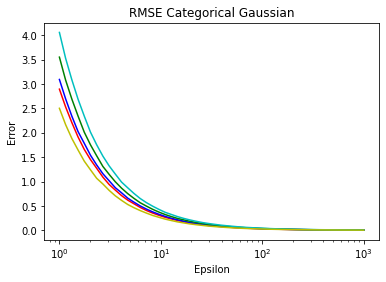

In [49]:
for idx, error in enumerate(gaussian_categorical_error):
    plt.semilogx(epsilons, error[0], colors[idx])

plt.semilogx(epsilons, laplace_categorical_rmse, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Categorical Gaussian")
plt.show()

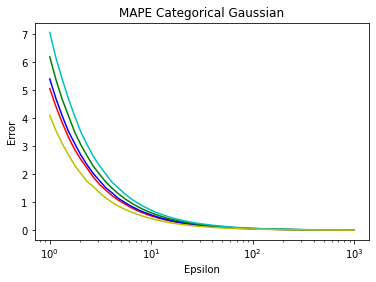

In [50]:
for idx, error in enumerate(gaussian_categorical_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.semilogx(epsilons, laplace_categorical_mape, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Categorical Gaussian")
plt.show()